In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from IPython.core.display import clear_output
import random

In [2]:
df19 = pd.read_pickle('raw2019women.pkl')
df20 = pd.read_pickle('raw2020women.pkl')

In [3]:
lineup = ['Dani Speegle','Kari Pearce','Kristine Best','Kara Saunders',
         'Camilla Salomonsson Hellman','Jamie Simmonds','Jamie Green','Emma McQuaid',
         'Amanda Barnhart','Haley Adams','Ragnheiður Sara Sigmundsdottir',
         'Kristin Holte','Brooke Wells','Melina Rodriguez','Gabriela Migala',
         'Laura Horvath','Tia-Clair Toomey',"Kristi Eramo","Kristi Eramo O'Connell"
         'Carol-Ann Reason-Thibault','Karin Freyova','Katrin Tanja-Davidsdottir',
         'Kendall Vincelette','Danielle Brandon','Harriet Roberts',
         'Bethany Shadburne','Andrea Solberg','Samantha Briggs',
         'Sanna Vanalainen','Andrea Nisler']

lineup_id = [670000,305891,280780,2942,2088,264512,239442,
            174547,671666,8859,120480,168305,534577,764556,591912,
            163097,310687,103389,698210,55121,262746,349097,2099,
            592472,466656,2536,534813,109085,115239,1018713]

points = [100, 96, 92, 88, 84, 80, 76, 72, 68, 64, 60, 56, 52, 49, 46,
         43, 40, 37, 34, 31, 28, 25, 22, 19, 16, 13, 10, 7, 4, 1]

In [4]:
#Data Cleaning/Prep

#drop unnecessary columns
df20_temp = df20[['entrant.competitorName','entrant.competitorId','scores']]
df19_temp = df19[['entrant.competitorName','entrant.competitorId','scores']]

#change competitor id column type to int
df20_temp['entrant.competitorId'] = df20_temp['entrant.competitorId'].astype('int')
df19_temp['entrant.competitorId'] = df19_temp['entrant.competitorId'].astype('int')

#merge
df_merged = df20_temp.merge(df19_temp, on='entrant.competitorId', how='outer')

#pull only those who are part of Games Lineup, remove NaN values, setup "rank field"
df = df_merged[df_merged['entrant.competitorId'].isin(lineup_id)].drop_duplicates(subset='entrant.competitorId',keep='first').rename(columns={
    'entrant.competitorName_x':'Name','scores_x':'scores2020','scores_y':'scores2019'}).reset_index(drop=True).drop(columns=['entrant.competitorId',
                                                                                                                            'entrant.competitorName_y'])
df = df.fillna(value=0)
df['ranks'] = 0
df['ranks'] = df['ranks'].astype('object')

#pull all scores and create series for each competitor
for i in range(len(df)):
    try:
        ranks20 = [wod['rank'] for wod in df.loc[i,'scores2020']]
    except:
        continue
    
    if df.loc[i,'scores2019'] == 0:
        df.at[i,'ranks'] = ranks20
    else:
        ranks19 = [wod['rank'] for wod in df.loc[i,'scores2019']]
        ranks = ranks20 + ranks19
        df.at[i,'ranks'] = ranks

#remove Kara Saunders 2020 open results (pregnant but still competed for fun)
df.at[10,'ranks'] = [24, 34, 68, 9, 18]        

df

C:\Users\mkriv\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mkriv\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Name,scores2020,scores2019,ranks
0,Ragnheiður Sara Sigmundsdottir,"[{'ordinal': 1, 'rank': '2', 'score': '1180040...","[{'ordinal': 1, 'rank': '6', 'score': '1350000...","[2, 3, 15, 2, 2, 6, 5, 2, 23, 4]"
1,Kristin Holte,"[{'ordinal': 1, 'rank': '5', 'score': '1180039...","[{'ordinal': 1, 'rank': '62', 'score': '133200...","[5, 1, 19, 16, 14, 62, 11, 13, 4, 3]"
2,Tia-Clair Toomey,"[{'ordinal': 1, 'rank': '10', 'score': '118003...","[{'ordinal': 1, 'rank': '86', 'score': '132700...","[10, 7, 22, 4, 13, 86, 12, 5, 6, 6]"
3,Jamie Simmonds,"[{'ordinal': 1, 'rank': '6', 'score': '1180039...","[{'ordinal': 1, 'rank': '71', 'score': '133000...","[6, 2, 49, 5, 3, 71, 6, 11, 2, 4]"
4,Kari Pearce,"[{'ordinal': 1, 'rank': '3', 'score': '1180040...","[{'ordinal': 1, 'rank': '79', 'score': '132800...","[3, 28, 3, 29, 8, 79, 18, 1, 1, 17]"
5,Emma McQuaid,"[{'ordinal': 1, 'rank': '1', 'score': '1180042...","[{'ordinal': 1, 'rank': '71', 'score': '133000...","[1, 16, 15, 6, 46, 71, 129, 35, 14, 10]"
6,Carol-Ann Reason-Thibault,"[{'ordinal': 1, 'rank': '8', 'score': '1180038...","[{'ordinal': 1, 'rank': '67', 'score': '133100...","[8, 13, 6, 70, 6, 67, 43, 4, 23, 25]"
7,Karin Freyová,"[{'ordinal': 1, 'rank': '60', 'score': '118003...","[{'ordinal': 1, 'rank': '3', 'score': '1358000...","[60, 25, 29, 25, 4, 3, 9, 108, 20, 58]"
8,Laura Horváth,"[{'ordinal': 1, 'rank': '36', 'score': '118003...","[{'ordinal': 1, 'rank': '16', 'score': '134300...","[36, 42, 40, 8, 21, 16, 7, 2518, 103, 12]"
9,Brooke Wells,"[{'ordinal': 1, 'rank': '16', 'score': '118003...","[{'ordinal': 1, 'rank': '36', 'score': '133600...","[16, 34, 2, 22, 74, 36, 1, 3, 45, 30]"


In [5]:
#Simulation

results_dict = defaultdict(list)
points_dict = defaultdict(list)
avgpoints_dict = defaultdict(list)

sims = 20000

for i in range(sims):
    temp = df.copy()
    
    #confirmed 7 events; otherwise randomize
    num_events = 7  #np.random.choice([7,8,9,10,11],p=[.75,.15,.04,.04,.02])
    
    #allow for different stdevs in the noise variables (conservative to aggressive)
    sigma = np.random.choice([0.3,0.35,0.4])

    for athlete in range(len(temp)):
        rand = random.random()
        
        #1 percent drop out risk
        if rand <= 0.01:
            scores = np.full(num_events,1000000)
        
        #otherwise draw from scores with some variability noise (both overall and event to event)
        else:
            weekend_noise = np.random.normal(1,sigma)
            wod_noise = np.random.normal(1,sigma,num_events)
            scores = np.random.choice(temp.loc[athlete,'ranks'],size=num_events,replace=True).astype(float) * weekend_noise * wod_noise
        
        #assign score to df (scale df by # of events)
        for e in range(num_events):
            col = 'score' + str(e+1)
            temp.at[athlete,col] = scores[e]

    #assign points by rank order of scores for each event
    for event in range(num_events):
        col = 'points' + str(event+1)
        score_col = 'score' + str(event+1)
        temp.sort_values(by=score_col,ascending=True,inplace=True)
        temp[col] = points
    
    #Sum total points
    col_slice = ['points' + str(event+1) for event in range(num_events)]
    
    temp['total'] = temp[col_slice].sum(axis=1)
    temp.sort_values(by='total', ascending=False, inplace=True)
    temp['final_rank'] = list(range(1,31,1))

    #Assign ranks/total points to each athlete's dictionary entry
    for ath in range(len(temp)):
        name = temp.loc[ath,'Name']
        results_dict[name].append(temp.at[ath,'final_rank'])
        points_dict[name].append(temp.at[ath,'total'])
        avgpoints_dict[name].append(temp.at[ath,'total'] / num_events)
    
    #track processing progress
    if i%10 == 0:
        clear_output(wait = True)
        print("Simulation {} of {} complete".format(i,sims))
    if i == (sims-1):
        clear_output(wait = True)
        print("done!")
        
#Calculate probablities of being in top 5
final = df.copy()

for athlete in range(len(final)):
    name = final.loc[athlete,'Name']
    
    temp = np.array(results_dict[name])
    p = np.sum(temp <= 5) / sims
    final.at[athlete,'Top_5_P'] = p

final.sort_values(by='Top_5_P',ascending=False,inplace=True)
final.reset_index(drop=True,inplace=True)

final[['Name','Top_5_P']]

done!


,Name,Top_5_P
0,Ragnheiður Sara Sigmundsdottir,0.95110
1,Jamie Simmonds,0.73825
2,Kristin Holte,0.60900
3,Tia-Clair Toomey,0.57055
4,Kari Pearce,0.54920
5,Brooke Wells,0.23415
6,Carol-Ann Reason-Thibault,0.22045
7,Emma McQuaid,0.17270
8,Dani Speegle,0.16135
9,Karin Freyová,0.12500


Text(0.5,1,'Stage 1 Crossfit Games: Women Top 5 Probabilities')

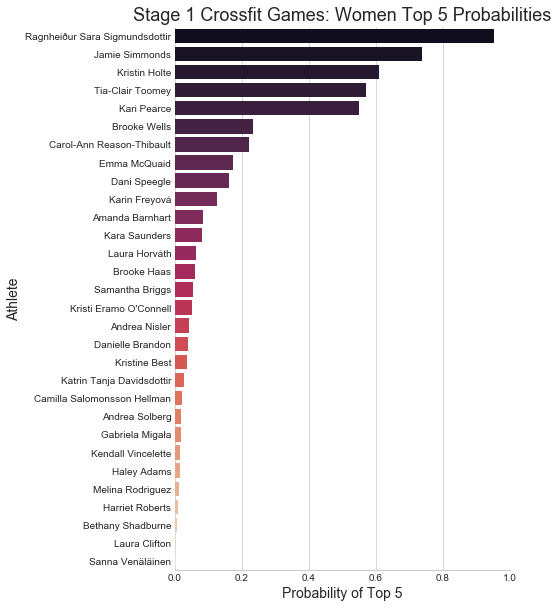

In [6]:
#Plot results
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(6, 10))
ax = sns.set_palette("rocket")
ax = sns.barplot(x = 'Top_5_P', y='Name',data=final,palette="rocket")

sns.despine(left=True)

ax.set_xlabel('Probability of Top 5',size=14)
ax.set_ylabel('Athlete',size=14)
ax.set_title('Stage 1 Crossfit Games: Women Top 5 Probabilities',size=18)

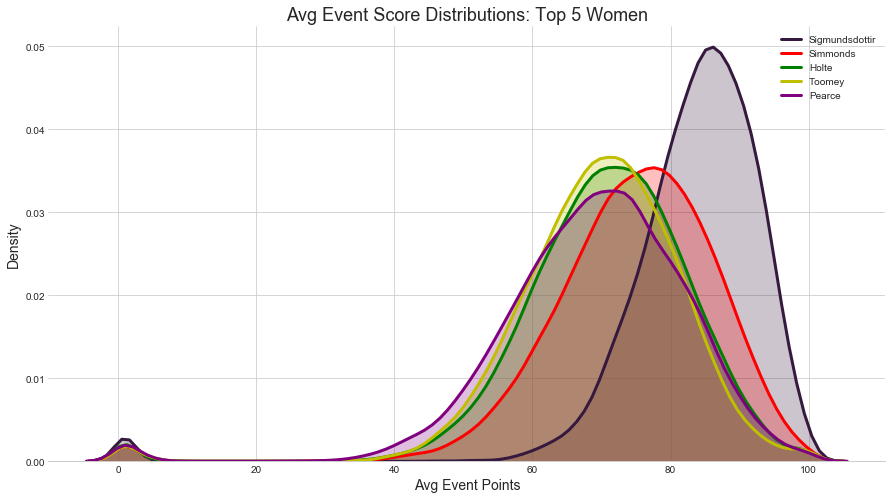

In [7]:
#Point distributions for top 5
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.distplot(avgpoints_dict['Ragnheiður Sara Sigmundsdottir'],kde=True,hist=False,label='Sigmundsdottir',kde_kws = {'shade': True, 'linewidth': 3})
ax = sns.distplot(avgpoints_dict['Jamie Simmonds'],kde=True,hist=False, color='r', label='Simmonds',kde_kws = {'shade': True, 'linewidth': 3})
ax = sns.distplot(avgpoints_dict['Kristin Holte'],kde=True,hist=False, color='g', label='Holte',kde_kws = {'shade': True, 'linewidth': 3})
ax = sns.distplot(avgpoints_dict['Tia-Clair Toomey'],kde=True,hist=False, color='y', label='Toomey',kde_kws = {'shade': True, 'linewidth': 3})
ax = sns.distplot(avgpoints_dict['Kari Pearce'],kde=True,hist=False, color='purple', label='Pearce',kde_kws = {'shade': True, 'linewidth': 3})

sns.despine(left=True)

ax.set_xlabel('Avg Event Points', size=14)
ax.set_ylabel('Density', size=14)
ax.set_title('Avg Event Score Distributions: Top 5 Women', size=18)
plt.legend()
plt.show()